# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [395]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [396]:
# Checking the number of mice.
mouse_count = len(mouse_study['Mouse ID'].unique())
mouse_count

249

In [397]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mouse_id = mouse_study.groupby(['Mouse ID'])['Timepoint']
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse['Mouse ID'].unique()

array(['g989'], dtype=object)

In [398]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study[mouse_study['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [399]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data= mouse_study.drop_duplicates(subset=['Mouse ID'])
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [400]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_mouse_data['Mouse ID'].unique())
clean_mouse_count

249

## Summary Statistics

In [401]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": std_dev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary.reset_index
# Assemble the resulting series into a single summary DataFrame.
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [402]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_adv = mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Using the aggregation method, produce the same summary statistics in a single line
summary_adv

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

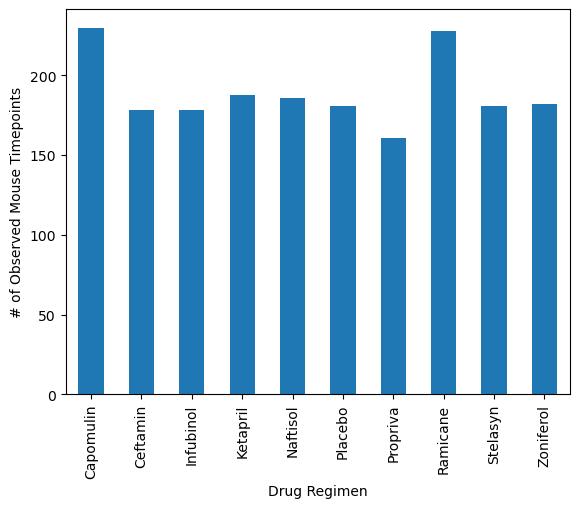

<Figure size 640x480 with 0 Axes>

In [403]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_type = mouse_study.groupby("Drug Regimen")

# Count how many rows (Mouse ID/Timepoints)
drug_regimen_mouse_count = drug_regimen_type["Drug Regimen"].count()

drug_count_chart = drug_regimen_mouse_count.plot(kind='bar', figsize=(6.5,5))

drug_count_chart.set_xlabel("Drug Regimen")
drug_count_chart.set_ylabel("# of Observed Mouse Timepoints")

# Set the xlabel and ylabel
plt.show()
plt.tight_layout()

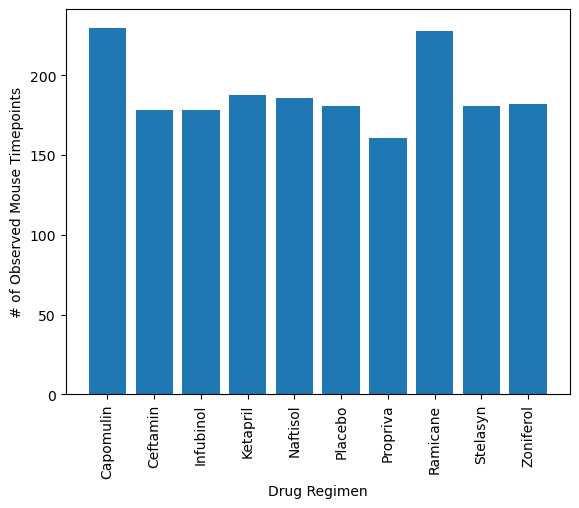

In [404]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6.5,5))
x_values = drug_regimen_mouse_count.index
y_values = drug_regimen_mouse_count.values
plt.bar(x_values, y_values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=90)

plt.show()

Sex
Male      958
Female    935
Name: count, dtype: int64


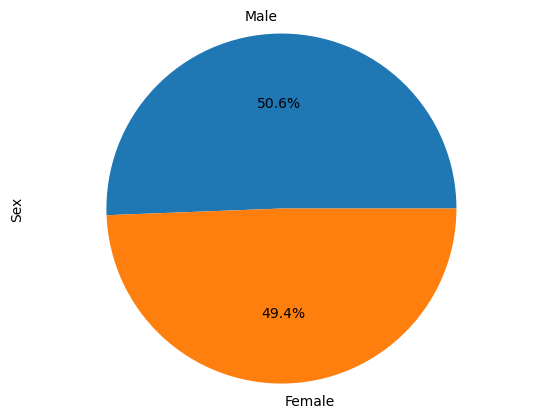

In [405]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = mouse_study["Sex"].value_counts()
percentages = (sex_count / sex_count.sum() * 100).round(1)
print(sex_count)
sex_count.plot.pie(autopct=lambda p: f'{p:.1f}%', startangle=360, figsize=(6.5, 5))

plt.ylabel("Sex")
plt.axis("equal")
plt.show()

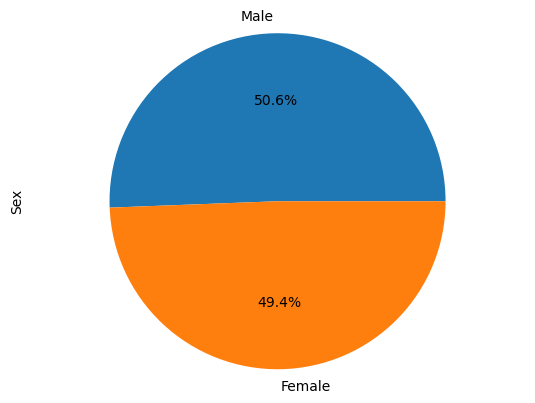

In [406]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex= ['Male', 'Female']
count= [958, 935]
plt.pie(count, labels=sex, autopct="%1.1f%%", shadow=False, startangle=0)
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [407]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study.groupby(["Mouse ID"])['Timepoint'].max()
greatest_timepoint = pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.merge(mouse_study, on=["Mouse ID", "Timepoint"])
greatest_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [408]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_regimen in drug_regimen_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = greatest_timepoint.loc[greatest_timepoint["Drug Regimen"] == drug_regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.75])
    first_quartile = quartiles[0.25]
    third_quartile = quartiles[0.75]
    IQR = third_quartile - first_quartile
    lower_bound = first_quartile - 1.5 * IQR
    upper_bound = third_quartile + 1.5 * IQR
    potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{drug_regimen}'s potential outliers: {potential_outliers}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


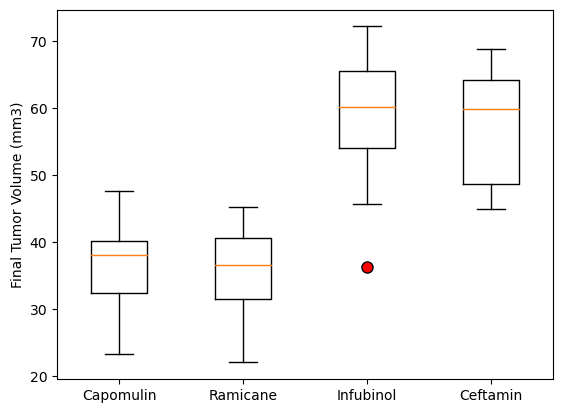

In [409]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(tumor_vol_list, labels=drug_regimen_treatments, flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':8})
plt.xticks(rotation=360)
plt.show()

## Line and Scatter Plots

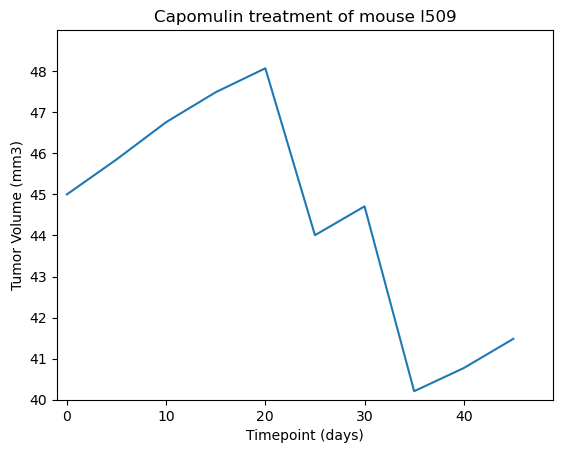

In [410]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
capomulin_mouse_id_l509 = mouse_study[(mouse_study["Drug Regimen"] == "Capomulin") & (mouse_study["Mouse ID"] == mouse_id)]
plt.plot(capomulin_mouse_id_l509["Timepoint"], capomulin_mouse_id_l509["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlim(-1,49)
plt.ylim(40,49)
plt.yticks(range(40, 49))
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [412]:
column_names = mouse_study.columns
print(column_names)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


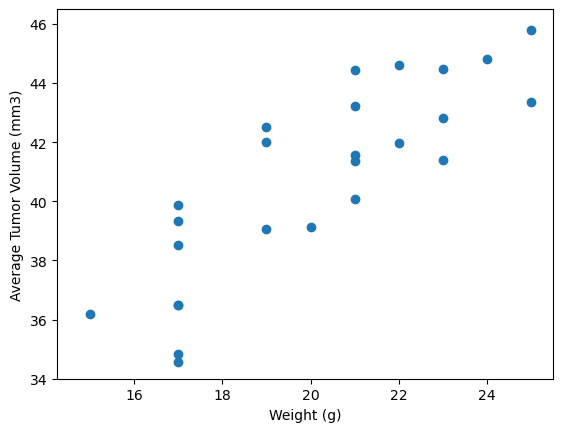

In [423]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]

weights = []
average_volumes = []

for mouse_id in capomulin_data["Mouse ID"].unique():
    mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
    average_volume = mouse_data["Tumor Volume (mm3)"].mean()
    weight = mouse_data["Weight (g)"].iloc[0]
    weights.append(weight)
    average_volumes.append(average_volume)

plt.scatter(weights, average_volumes)
plt.xlim(14.25,25.5)
plt.ylim(34,46.5)
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


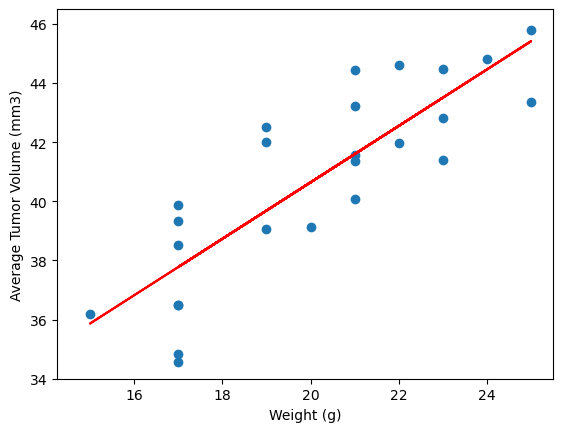

In [434]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = st.pearsonr(weights, average_volumes)[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]

weights = []
average_volumes = []

for mouse_id in capomulin_data["Mouse ID"].unique():
    mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]
    average_volume = mouse_data["Tumor Volume (mm3)"].mean()
    weight = mouse_data["Weight (g)"].iloc[0]
    weights.append(weight)
    average_volumes.append(average_volume)
    
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, average_volumes)
regress_values = [weight * slope + intercept for weight in weights]
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# create plot
plt.scatter(weights, average_volumes)
plt.plot(weights,regress_values,"r-")
plt.xlim(14.25,25.5)
plt.ylim(34,46.5)
plt.xlabel('Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()